# Adversarial Attacks
## _Creating Adversarial Examples using the Fast Gradient Sign Method (FGSM)_ 
_Seminar:_    Business Analytics \\
_Name:_       Jan Dellner \\
_Betreuer:_   Prof. Dr. Christoph Flath



# Table of Contents
1. [Theoretical Background](#background) <br>
    1.1 [Adversarial Attacks & Adversarial Examples](#aa_ae) <br>
    1.2 [Fast Gradient Sign Method](#T_FGSM) <br>
    1.3 [MobileNetV2](#T_MNV2) <br>
    1.4 [ImageNet labels](#T_labels) <br>
2. [Model Preparation](#modeling) <br>
    2.1 [Acknowledgements](#acknowledgements) <br>
    2.2 [Loading framework](#framework) <br>
    2.3 [Loading MobileNetV2](#M_MNV2) <br>
3. [Detailed example generation](#M_detailed) <br>
    3.1 [Classification of original image](#D_classification) <br>
    3.2 [Creating the perturbation](#D_Perturbation) <br>
    3.3 [Plotting the perturbed image with different $\epsilon$ values](#D_perturbations) <br>
    3.4 [Conclusion detailed example](#D_conclusion) <br>
4. [Further Adversarial Examples](#F_examples) <br>
    4.1 [Bullfrog](#F_bullfrog) <br>
    4.2 [Border collie](#F_bordercollie) <br>
    4.3 [Loggerhead turtle](#F_turtle) <br>
    4.4 [Conclusion Adversarial Example generation](#F_conclusion) <br>
5. [Conclusion](#conclusion) <br>


#1. Theoretical Background
<a id="background"></a>

In the beginning of this notebook the most important facts about Adversarial Attacks and Adversarial Examples are summarised. Following by a short theoretical description of the Fast Gradient Sign Method by [Goodfellow et al. (2015)](https://arxiv.org/abs/1412.6572), which will be later used for creating different Adversarial Examples.
At last a short description about the used Image Classification model MobileNetV2 and the corresponding labels from the ImageNet data set is given.

##1.1 Adversarial Attacks & Adversarial Examples

__General strucuture and context of Adversarial Attacks__ <br>
Adversarial Attacks use specifically generated inputs (i.e images, audio or text) for Machine Learning models which were intentionally designed by the adversary to cause the destination model to misclassify the given input. The carefully constructed inputs of Adversarial Attacks are hereby called Adversarial Examples. They can be seen as optical illusions for the Machine Learning model, but for a human being the differences to the original input are in some cases hardly to non recognizable [(Papernot, McDaniel, Goodfellow, et al., 2017)](https://arxiv.org/abs/1602.02697). This kind of attack is realized in this implementation. <br>

Mathematically speaking, the goal of a successful Adversarial Attack is to generate an Adversarial Example $X$* $= X + \delta X$ in which the smallest possible disturbance $\delta X $ is added to the input image $X$ and still the output conditions $F(X$*$) = Y$* and $Y$* $\neq F(X)$ are fulfilled [(Papernot, McDaniel, Wu, et al., 2016)](https://arxiv.org/abs/1511.04508). <br>

![Adversarial Example generation](https://raw.githubusercontent.com/DeJa811/Seminar_BusinessAnalytics_Adversarial_Attacks/master/notebook/Papernot%20Adversarial%20Attacks.jpg) <br>
[Graphic by Papernot, McDaniel, Wu, et al., 2016)](https://arxiv.org/abs/1511.04508)
<br>
<br>
However there are also kinds of Adversarial Examples which are visually noticeable for the human eye and where the sole purpose is to make the original object invisible for a Machine Learning object detector or misclassify it. These Adversarial Examples are called Adversarial Patches and their focus is to fool the Machine Learning model in the physical environment like in a surveillance scenario [(Brown et al., 2017)](https://arxiv.org/abs/1712.09665). This kind of attack is not realized in this implementation.

__Targeted attack and non-targeted attack__ <br>
In a _targeted Attack_ the adversary wants the Machine Learning model to have a certain object class as their output of the designed input. This kind of attack is more difficult to achieve than a non-targeted attack due to the more limited possible variables which can be altered in the input data in the process of the Adversarial Example creation. <br>

In a _non-targeted attack_ the objective of the adversary is to achieve that the model solely misclassifies the given designed input as another object class. In other words every achieved object class than the actual class is a successful attack. Because of that non-targeted attacks are more feasible due to their less limited objective [(Ilyas, Engstrom, et al., 2018)](https://arxiv.org/abs/1804.08598).

__White-box Attack and Black-box Attack__ <br>
In a _White-box Attack_ setting the adversary - in different degrees - has information about the used architecture, Machine Learning model and information about the weights of the model or even direct access to the used model. Therefore the adversary can directly adjust the necessary data points to create the Adversarial Examples for the destination model.

In a _Black-box Attack_ setting the specified information from above is not accessible for the adversary, so there is no direct information about the used algorithm or relevant data [(Chen et al., 2017)](https://arxiv.org/abs/1708.03999).


##1.2 Fast Gradient Sign Method

The Fast Gradient Sign Method was first described by [(Goodfellow, Shlens, and Szegedy (2015)](https://arxiv.org/abs/1412.6572) and is a gradient based attack mechanism, which is mainly used in White-box settings. This approach modifies the corresponding color intensity for each separate pixel of the input image by the smallest amount possible in the upwards or downwards direction of the color space. These individual small changes have a large impact for the output of the model as a whole, which creates the adversarial example within the aimed confidence target. The mathematical equation for finding a corresponding perturbation for a given input image using the FGSM is shown below.

$\eta = \epsilon~sign(\nabla_{x}J(\Theta,x,y))$ 

By linearizing the cost function $J(\Theta,x,y)$ in relation to the parameters of the model $\Theta$, the optimal perturbation $\eta$ for the respective input can be found. In this regard, backpropagation can be used to calculate the corresponding gradient $\nabla$ of the perturbation.  The $\epsilon$ value controls the degree with which the image is to be changed. A high $\epsilon$ value increases the success rate of the Adversarial Attack, but also creates visible visual changes to the original input image for the human eye, which makes the perturbation more obvious. This calculated vector is in the end added to the original input image $x$ to create the Adversarial Example $adv\_x$.

$adv\_x = x ~+~\eta $

The main advantage of FGSM is the low computation time, due to the fact that the perturbation of the input image is computed within a single step. Furthermore, FGSM is relatively easy to implement compared to other methods, which is also one of the reasons why the FGSM is fairly popular. However, because of aim for fast computation and relatively easy implementation this method lacks in quality of the Adversarial Examples in contrast to the method of Carlini-Wager Attack [(Carlini and Wagner, 2017)](https://arxiv.org/abs/1608.04644) for example.

##1.3 MobileNetV2

The targeted model by the implemented attack is MobileNetV2 by [(Sandler, Howard, Zhu, et al. 2018)](https://arxiv.org/abs/1801.04381) and is explicitly designed for mobile platforms to increase the performance arcoss a specturm of different model sizes. This is achieved by a inverted residual structure, where non-linearities in narrow layers are removed. MobileNetV2 consists of two blocks and three layers in each block. <br>
![MobileNetV2 strucuture](https://raw.githubusercontent.com/DeJa811/Seminar_BusinessAnalytics_Adversarial_Attacks/master/notebook/MobileNetV2.jpg) <br>
Graphic by [Sandler, Howard, Zhu, et al. (2018)](https://arxiv.org/pdf/1801.04381.pdf)
<br>
<br>

__1)__ In the first layer ReLU6 is used in a 1x1 convolution for comparing the inputs. 

__2)__ The second layer is a 3x3 depthwise convolution, which uses a single convolutional filter for each input channel. This can be seen as a lightweight filtering.

__3)__ The last layer is also a 1x1 convolution but without non-linearity. <br>

##1.4 ImageNet labels

The used weights and labels for pretrained MobileNetV2 used in this code are based on ImageNet database. ImageNet is an image database with over 14 million pictures with around 20.000 categories of nouns for classificating images. These nouns a based on the WordNet hierarchy. Every category of nouns consists of at least 500 different images [(Image-net.org)](http://image-net.org/about-overview). 

#2. Model Preparation
<a id="modeling"></a>

This chapter includes the acknowledgements for the used code. As well as the components for loading the framework and the already pretrained MobileNetV2 model on ImageNet.

##2.1 Acknowledgements
<a id="acknowledgements"></a>

1) The following code is based on the tutorial from [Adversarial example using FGSM](https://www.tensorflow.org/tutorials/generative/adversarial_fgsm) by [Tensorflow.org](https://tensorflow.org)

2) All [used images](https://github.com/DeJa811/Seminar_BusinessAnalytics_Adversarial_Attacks/tree/master/images) for the generation of Adversarial Examples in this section were taken by the author itself, so no copyrights are infringed by using these pictures.

3) The performed attack can be categorized as a non-targeted, White-box attack usign FGSM.

##2.2 Loading the framework

At the beginning the necessary packages for creating and plotting the Adversarial Examples are imported. At the same time the environment will be set to the new version [_Tensorflow 2.0_](https://www.tensorflow.org/guide/effective_tf2) in order to make the notebook usable in the future without unnecessary detours. <br>

Furthermore the global settings for the graphs are set to avoid differences in format.

In [0]:
# Importing the relevant & needed packages
from __future__ import absolute_import, division, print_function, unicode_literals

try:
    %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

# Global setting for graphs
mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

TensorFlow 2.x selected.


##2.3 Loading MobileNetV2

In the following passage a already pretrained version of the MobileNetV2 model is loaded, which was already theoretically introduced in _chapter 1.3_. Additionally the class names from the ImageNet database are added as the corresponding final weights of the model.

Following, a first helper function is utilized to preprocess the used images for the MobileNetV2 model: 
- The color space of the image is set to 0~255 to visualize the normal 8-bit RGB-color space of an image and to limit the color space to the human visible spectrum.
- The image is resized to a pixel size of 224 x 224 pixels, as this is the necessary input size for the model. Therefore it is important to use quadratic input pictures to avoid distortions of the subject, because stretching the image to fit the quadratic size limitations could lead to false classifications.

The second helper function is defined in this step to later extract the corresponding labels from the probability vector of the different used input images.

In [0]:
# Loading the already pretrained model MobileNetV2 & setting the trainability of the model to false
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                     weights='imagenet')
pretrained_model.trainable = False

# Setting ImageNet for MobileNetV2 as the source for the labels
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions


# Helper functions (Defined here - but used later in every single run of Image Classfication):

# Helper function one preprocesses the image so that it can be inserted for Image Classification in MobileNetV2
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = image/255
  image = tf.image.resize(image, (224, 224))
  image = image[None, ...]
  return image

# Helper function two extracts the labels from probability vectors of the images
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

14540800/14536120 [==============================] - 0s 0us/step


#3. Detailed example generation

In this chapter a detailed generation of an Adversarial Examples is shown. Starting with the classification of the original image, which shows a _dragonfly_. In the second step the perturbation for this given image is computed and shown as an amplified version. In the last step the perturbation is added to the image with different $\epsilon$ values. These different images are then plotted to show the change in visual quality for the set $\epsilon$ values and to show the corresponding classifications and potential Adversarial Examples from the pretrained model. 

 ## 3.1 Classification of the original image
In the first step the chosen image is inserted with its original resolution of 1701 x 1701 px and its corresponding true ImageNet class. Following with the application of the in _chapter 2.3_ determined preprocessing steps to the picture by reducing it to 224 x 224 px to be able to process the image as an input for the MobileNetV2 model.

Afterwards the image is classified by the already pretrained Image Recognition model and is plotted with its associated class label from the ImageNet database including the confidence of the class.

40960/35363 [==================================] - 0s 0us/step


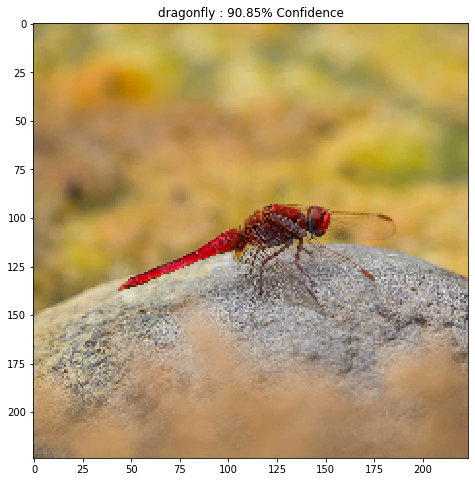

In [0]:
# Loading the input image
source = tf.keras.utils.get_file('dragonfly.jpg', 'https://raw.githubusercontent.com/DeJa811/Seminar_BusinessAnalytics_Adversarial_Attacks/master/images/dragonfly.jpg')
image_class = 208
image_raw = tf.io.read_file(source)
image = tf.image.decode_image(image_raw)

# Preprocess the image with the first helper function & extract the labels with the use of the second helper function
image = preprocess(image)
image_probs = pretrained_model.predict(image)
image_label = tf.one_hot(image_class, image_probs.shape[-1])

# Printing the image as a graph according to the set global setting & adding the class name and the confidence value in the title
plt.figure()
plt.imshow(image[0])
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

In this example a picture of a _dragonfly_ is classified correctly with a corresponding confidence rate of _90.85%_.

## 3.2 Create the perturbation

### Implementing the Fast Gradient Sign Method
In this step the perturbation of the original image is created. The gradients for each input image are changed accordingly to generate an successful Adversarial Example at the end.  This section also shows the advantage of the FGSM in form of its low computation time from _chapter 1.2_, because the perturbation can be calculated by only this short step.  

In [0]:
# Computing the crossentropy loss between the label and the prediction
loss_object = tf.keras.losses.CategoricalCrossentropy()

# Helper function three for computing the adversarial noise
def adversarial_noise(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Determine the gradients of the loss from the corresponding input image.
  gradient = tape.gradient(loss, input_image)

  # Determine the sign of the gradients to create the unique perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

# Calculate the final perturbation values for the input image 
perturbation = adversarial_noise(image, image_label)

###Plotting the amplified noise

In the next section the created perturbation according to this input image is shown. The noise is plotted in this step in an enhanced mode without the limitation by an $\epsilon$ value to better illustrate the changes of each individual pixel for the given input image. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


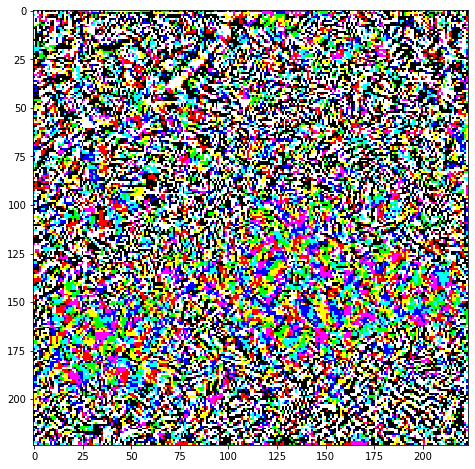

In [0]:
# Visualize the amplified noise for the given input image
plt.imshow(perturbation[0])

## 3.3 Plotting the perturbed image with different $\epsilon$ values

In this section the perturbation is added to the original image creating the Adversarial Examples by using a range of different $\epsilon$ values. 
<br> 

__Shown most interesting $\epsilon$ values:__ |  0.00  |  0.003  |  0.012  |  0.12  |  1.00  |
<br>

__Recap:__ The $\epsilon$ value controls the degree with which the image is to be changed. A high $\epsilon$ value increases the success rate of the Adversarial Attack, but also creates visible visual changes to the original input image for the human eye, which makes the perturbation more obvious. 

In this preprocessing step the corresponding adjustments for plotting each version of the perturbated image are set.

In [0]:
# Define the rules for plotting each calculated Adversarial Example
def plot_adversarial_example(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  plt.imshow(image[0])
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description, label, confidence*100))
  plt.show()

###Original image: $\epsilon$ = 0

By setting the $\epsilon$ value to zero the original image remains unchanged as the perturbation is not applied to the image.

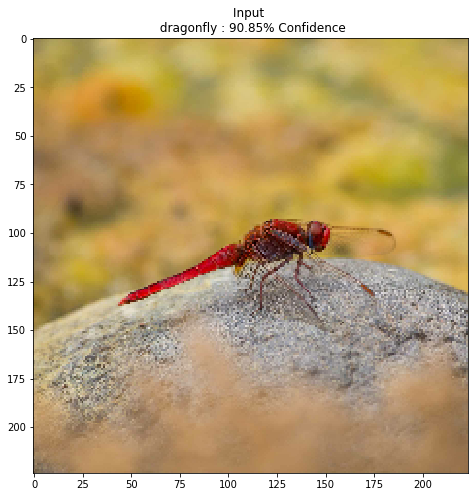

In [0]:
# Used epsilon value for the perturbation of the original image
epsilon = [0]

# Calculating the adversarial example with the given formula shown in chapter 1.2
adv_x = image + epsilon*perturbation
adv_x = tf.clip_by_value(adv_x, 0, 1)

# Plotting the calculated Adversarial Example with the defined rules above & chosen title
plot_adversarial_example(adv_x, "Input")

Due to $\epsilon$ = 0 the original picture is classified correctly again as a _dragonfly_ with a high confidence of _90.85%_.

### $\epsilon$ = 0.003

Now the $\epsilon$ value is set to a small value of _0.003_, thus the perturbation has just a small impact on the original image. 

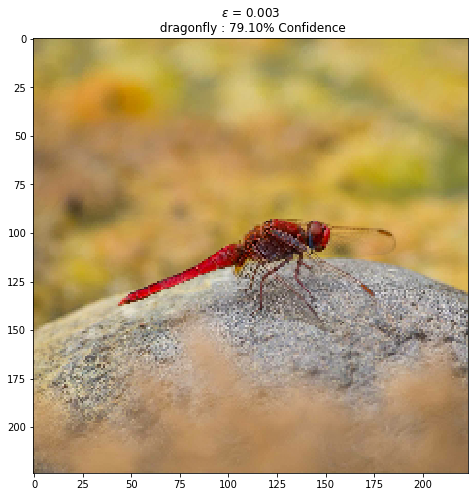

In [0]:
# Used epsilon value for the perturbation of the original image
epsilon = [0.003]

# Calculating the adversarial example with the given formula shown in chapter 1.2
adv_x = image + epsilon*perturbation
adv_x = tf.clip_by_value(adv_x, 0, 1)

# Plotting the calculated Adversarial Example with the defined rules above & chosen title
plot_adversarial_example(adv_x, "$\epsilon$ = 0.003")

The classification as a _dragonfly_ remains unchanged. However the confindence of the model went down _11.66_ percentage points from _90.85%_ to _79.10%_, which is still more the enough to be able to rely on this classification. 

For a human observer no changes in quality are visible at this point compared to the original image.

### $\epsilon$ = 0.012

The $\epsilon$ value has been increased again by a factor of four to _0.012_, which leads to a misclassification of the input image. Therefore this output can be classifed as an Adversarial Example.

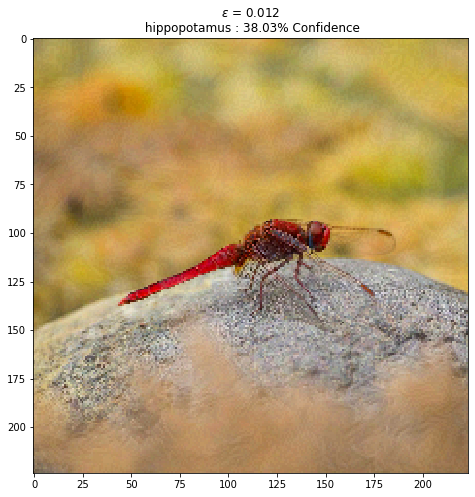

In [0]:
# Used epsilon value for the perturbation of the original image
epsilon = [0.012]

# Calculating the adversarial example with the given formula shown in chapter 1.2
adv_x = image + epsilon*perturbation
adv_x = tf.clip_by_value(adv_x, 0, 1)

# Plotting the calculated Adversarial Example with the defined rules above & chosen title
plot_adversarial_example(adv_x, "$\epsilon$ = 0.012")

The input picture was incorrectly classified as a _hippopotamus_, with a corresponding confidence of _38.03%_ by the model. A first success as an Adversarial Attack. <br>

However upon careful inspection, slight noise is noticeable in the background of the perturbed image for the human eye in a straight one-to-one comparison to the original image. Though nothing that would cause any concerns if a direct comparison is not possible.

### $\epsilon$ = 0.12

The $\epsilon$ value is further increased by a factor of 10 to _0.12_.

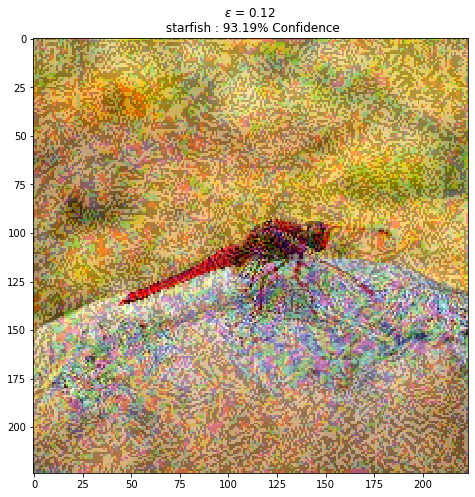

In [0]:
# Used epsilon value for the perturbation of the original image
epsilon = [0.12]

# Calculating the adversarial example with the given formula shown in chapter 1.2
adv_x = image + epsilon*perturbation
adv_x = tf.clip_by_value(adv_x, 0, 1)

# Plotting the calculated Adversarial Example with the defined rules above & chosen title
plot_adversarial_example(adv_x, "$\epsilon$ = 0.12")

The image is misclassified again, but this time as a _starfish_ with a high confidence of _93.19%_. <br>
However, the available noise in the image at this point is more than visible. Some textures of the original image like the translucent wings of the _dragonfly_ are even hard to recognize with this $\epsilon$ value for the human eye.

### Amplified noise: $\epsilon$ = 1

At last for demonstration the $\epsilon$ value is set to _1_, generating the same output as in _chapter 3.2_ where only the amplified noise was plotted.

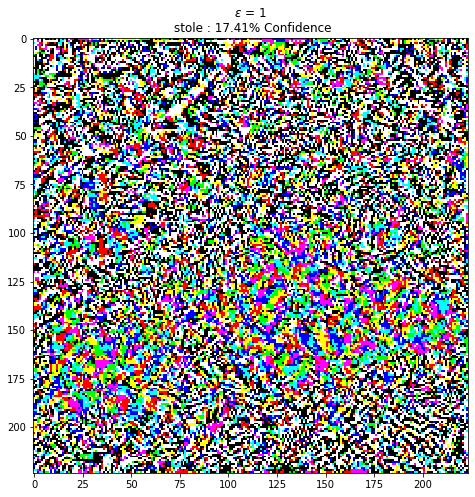

In [0]:
# Used epsilon value for the perturbation of the original image
epsilon = [1]

# Calculating the adversarial example with the given formula shown in chapter 1.2
adv_x = image + epsilon*perturbation
adv_x = tf.clip_by_value(adv_x, 0, 1)

# Plotting the calculated Adversarial Example with the defined rules above & chosen title
plot_adversarial_example(adv_x, "$\epsilon$ = 1")

With the $\epsilon$ value set to 1 the pure amplified noise is classified as a _stole_ with a confidence of _17.41%_

## 3.4 Conclusion detailed example

The best result between visual noise in the output and the corresponding confidence value was achieved with an $\epsilon$ value of $0.12$. In this case the created Adversarial Example had a confidence of $38.03\%$ and was classified as a __hippopotamus__. <br>

In conclusion the performed changes to the input image are summarized in the graphic below: <br>
<br>
![Adversarial example generation](https://raw.githubusercontent.com/DeJa811/Seminar_BusinessAnalytics_Adversarial_Attacks/master/notebook/dragonfly_adversarial_example_generation.jpg)
<br>
<br>
 

In the following graphic the differences in image quality between the original image and the generated Adversarial Example with $\epsilon$ _= 0.012_ can be compared in a magnified area. <br>
The upper segment shows the original image and the lower segment the generated Adversarial Example.
<br>
<br>
![Comparison noise](https://raw.githubusercontent.com/DeJa811/Seminar_BusinessAnalytics_Adversarial_Attacks/master/notebook/comparison_noise.jpg)

At this enlargement size of the output the differences in the picture noise are clearly recognizable. However, this image noise could easily be mistaken by a human observer for the noise of a picture from bad camera or as compression artifacts by downsampling the original imagesize.

#4. Further Adversarial Examples generation

In this chapter additional pictures are perturbed using FGSM in a shortend process to show the created results for other example images. 

## 4.1 Bullfrog

221184/213145 [===============================] - 0s 0us/step


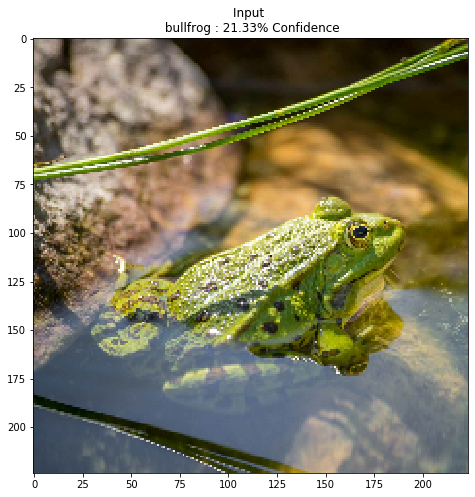

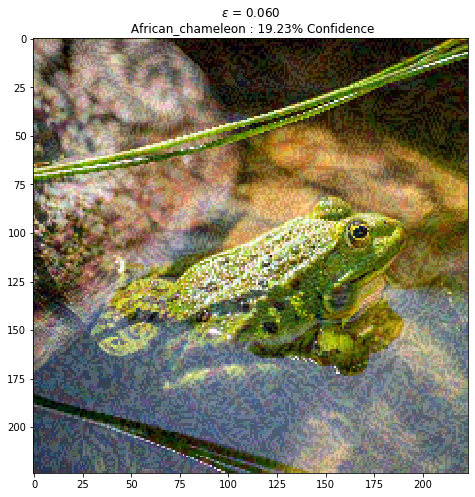

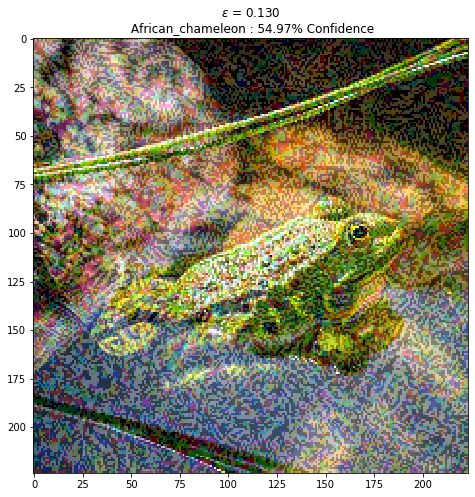

In [0]:
# Loading the input image & apply the preprocessing steps to it
source = tf.keras.utils.get_file('frog.jpg', 'https://raw.githubusercontent.com/DeJa811/Seminar_BusinessAnalytics_Adversarial_Attacks/master/images/frog.jpg')
image_raw = tf.io.read_file(source)
image = tf.image.decode_image(image_raw)
image = preprocess(image)
image_probs = pretrained_model.predict(image)
class_confidence = get_imagenet_label(image_probs)

# Computing the crossentropy loss between the labels and the predictions
loss_object = tf.keras.losses.CategoricalCrossentropy()

# Applying helper function three for computing the adversarial noise
def adversarial_noise(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Determine the gradients of the loss from the corresponding input image.
  gradient = tape.gradient(loss, input_image)

  # Determine the sign of the gradients to create the unique perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

# Calculate the final perturbation values for the input image 
perturbation = adversarial_noise(image, image_label)



# Printing several images at once with the wanted epsilon values by using a for loop
epsilons = [0.00, 0.06, 0.13]

descriptions = [('$\epsilon$ = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = image + eps*perturbation
  adv_x = tf.clip_by_value(adv_x, 0, 1)
  plot_adversarial_example(adv_x, descriptions[i])

The original image is classified correctly as a _bullfrog_ with a fairly low confidence value of _21.33\%_. <br>
By setting the $\epsilon$ value to _0.06_ the model misclassifies the _bullfrog_ as an _African chameleon_ with a confidence of _19.23\%_. With further increasing the $\epsilon$ value to _0.13_ the confidence for the _African chameleon_ class rises to _54.97\%_.

## 4.2 Border collie

114688/113581 [==============================] - 0s 0us/step


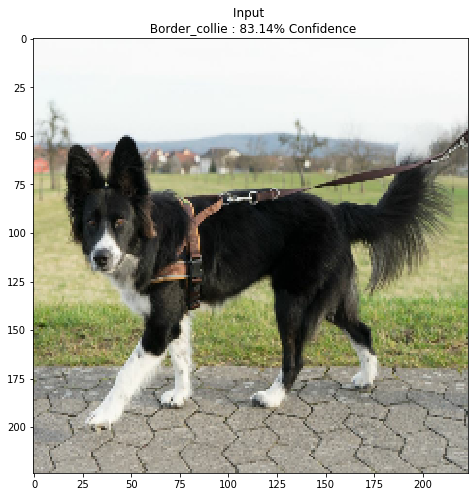

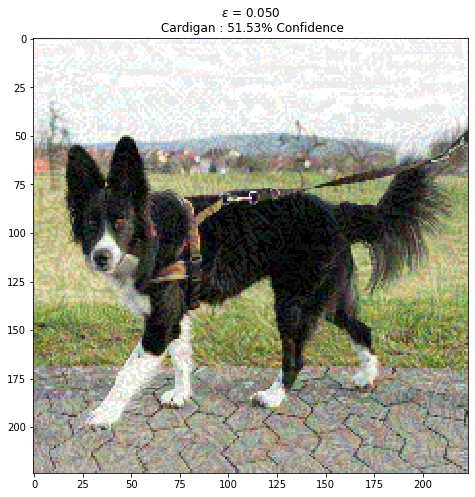

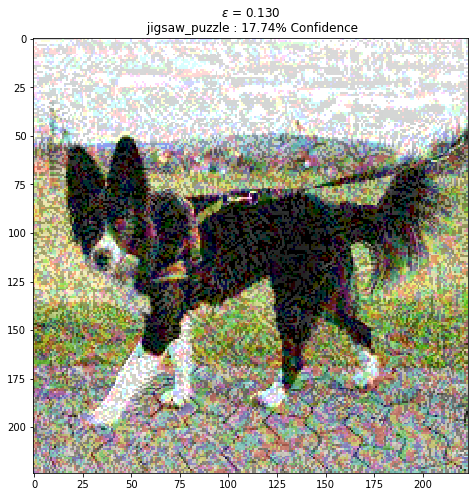

In [0]:
# Loading the input image & apply the preprocessing steps to it
source = tf.keras.utils.get_file('bordercollie.jpg', 'https://raw.githubusercontent.com/DeJa811/Seminar_BusinessAnalytics_Adversarial_Attacks/master/images/bordercollie.jpg')
image_raw = tf.io.read_file(source)
image = tf.image.decode_image(image_raw)
image = preprocess(image)
image_probs = pretrained_model.predict(image)
class_confidence = get_imagenet_label(image_probs)

# Computing the crossentropy loss between the labels and the predictions
loss_object = tf.keras.losses.CategoricalCrossentropy()

# Applying helper function three for computing the adversarial noise
def adversarial_noise(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Determine the gradients of the loss from the corresponding input image.
  gradient = tape.gradient(loss, input_image)

  # Determine the sign of the gradients to create the unique perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

# Calculate the final perturbation values for the input image 
perturbation = adversarial_noise(image, image_label)



# Printing several images at once with the wanted epsilon values by using a for loop
epsilons = [0, 0.05, 0.13]
descriptions = [('$\epsilon$ = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = image + eps*perturbation
  adv_x = tf.clip_by_value(adv_x, 0, 1)
  plot_adversarial_example(adv_x, descriptions[i])

The original image is classified correctly as a _border collie_ with a confidence value of _83.14\%_. <br>
However by setting the $\epsilon$ value to _0.05_ the model misclassifies the _border collie_ as a _cardigan_ with a confidence of _51.53\%_. With further increasing the $\epsilon$ value to _0.13_ the class label changes again to a _jigsaw puzzle_ with a corresponding confidence of _17.74\%_.

##4.3 Loggerhead turtle

344064/336754 [==============================] - 0s 0us/step


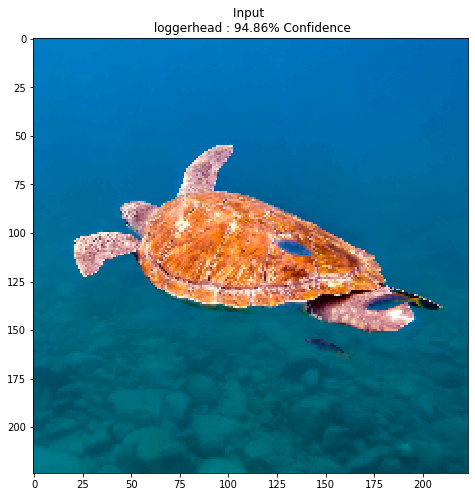

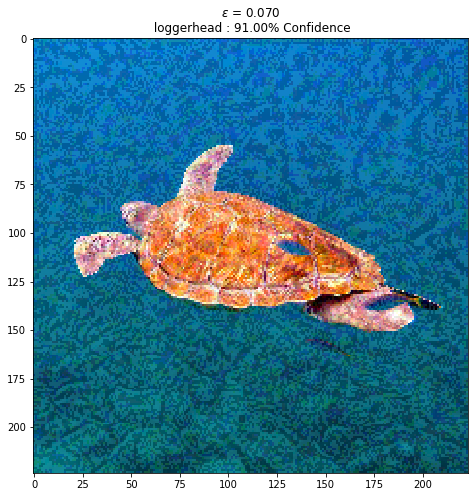

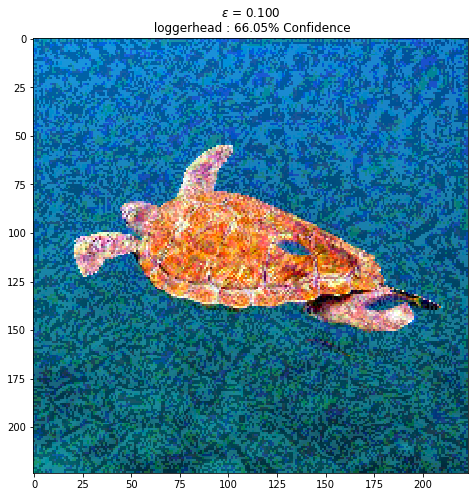

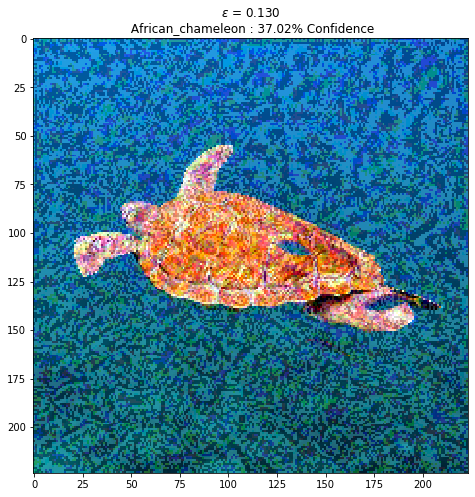

In [0]:
# Loading the input image & apply the preprocessing steps to it
source = tf.keras.utils.get_file('turtle.jpg', 'https://raw.githubusercontent.com/DeJa811/Seminar_BusinessAnalytics_Adversarial_Attacks/master/images/turtle.jpg')
image_raw = tf.io.read_file(source)
image = tf.image.decode_image(image_raw)
image = preprocess(image)
image_probs = pretrained_model.predict(image)
class_confidence = get_imagenet_label(image_probs)

# Computing the crossentropy loss between the labels and the predictions
loss_object = tf.keras.losses.CategoricalCrossentropy()

# Applying helper function three for computing the adversarial noise
def adversarial_noise(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Determine the gradients of the loss from the corresponding input image.
  gradient = tape.gradient(loss, input_image)

  # Determine the sign of the gradients to create the unique perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

# Calculate the final perturbation values for the input image 
perturbation = adversarial_noise(image, image_label)



# Printing several images at once with the wanted epsilon values by using a for loop
epsilons = [0, 0.07, 0.1, 0.13]
descriptions = [('$\epsilon$ = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = image + eps*perturbation
  adv_x = tf.clip_by_value(adv_x, 0, 1)
  plot_adversarial_example(adv_x, descriptions[i])

The original image is classified correctly as a _loggerhead_ with a confidence value of _94.86\%_. <br>
However, this image is much harder to turn into an Adversarial Example than the previous images. When setting the $\epsilon$ value to _0.07_, there is still a confidence rate of _90\%_ for the image being a _loggerhead_. All previous images have already been misclassified by the model at lower $\epsilon$ values. Even at an $\epsilon$ value of _0.1_, there is still a confidence of _66\%_ that the image contains a _loggerhead_. Only with an $\epsilon$ value of _0.13_, the _loggerhead_ is misclassified as _African chameleon_ with a confidence of _37\%_.

##4.4 Conclusion Adversarial Example generation

With the FGSM different images were converted into Adversarial Examples, although the required $\epsilon$ values for successfully changing the classifications differed noticeably. This also had an effect on the optical appearance by means of varying visual noise levels in the images. 

In the following table the most important $\epsilon$ values for the four different example images are summarised:



\begin{array}{ccc|ccc}
\textbf{Input class} & \textbf{Input confidence}&~&~&\textbf{Adversarial class}&\textbf{$\epsilon$ value}&\textbf{Adversarial confidence}\\
\hline
dragonfly&90.85\%&~&~&hippopotamus&0.012&38.03\%\\
bullfrog&21.33\%&~&~&African~chameleon&0.060&19.23\%\\
border~collie&83.14\%&~&~&Cardigan&0.050&51.53\%\\
loggerhead~turtle&94.86\%&~&~&African~chameleon&0.130&37.02\%\\
\end{array}

Unfortunately it was not possible for any generated Adversarial Example to achieve a higher confidence than for the original input image while maintaining moderate $\epsilon$ values. However, with the example _border collie_ a relatively high confidence of _51.53%_ was achieved despite the fact that the adversarial class _cardigan_ differs significantly from the original class _border collie_.

#5. Conclusion

Finally, it can be said that the Fast Gradient Sign Method by [Goodfellow et al. (2015)](https://arxiv.org/abs/1412.6572). was successfully applied to several images. The achieved results varied in quality, but it should also be noted that this method is mainly known for its lean implementation and not for the high visual clarity of the generated Adversarial Examples. <br>
In general, many interesting areas in the field of Adversarial Attacks remain to be explored for future research. Especially the topics about successful defense strategies against Adversarial Attacks and the prevention of transferability hold significant interest. <br>
